### ALP spectrum averaged over 10, 20, 25, and 30 seconds

In [1]:
import numpy as np
import os, sys
import matplotlib.pyplot as plt

In [2]:
sys.path.append('/Users/milena/Desktop/2nd_yr_project/ALPs/ALPs_analysis/') # path to calc_alp_signal script
from scipy import integrate
from calc_alp_signal import ALPSNSignal


E_MeV = np.load('bn121225417_EMeV.npy') # taking the energy from the LLE file
alp_sn10 = ALPSNSignal(Mprog = 10.)

t = [10, 20, 25, 30]
ts = []
dndedt_alp10 = []
SED10 = []

for i in t:
    ts.append(np.linspace(0.,i,len(E_MeV)))

for j in range(len(t)):
    dndedt_alp10.append(alp_sn10(E_MeV, ts[j], g10=0.1))
    SED10.append(integrate.simps(dndedt_alp10[j], ts[j])/t[j])

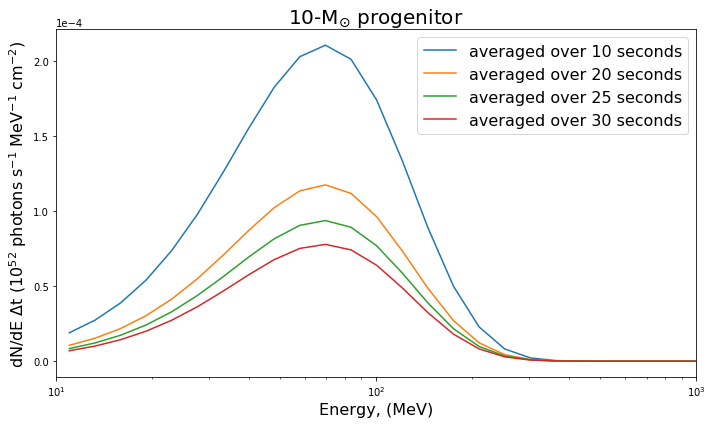

In [3]:
plt.figure(figsize=(10,6))
for i in range(len(t)):
    plt.plot(E_MeV, SED10[i], label = 'averaged over %.f seconds' %t[i])
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xscale('log')
plt.xlim(10,1000)
plt.xlabel('Energy, (MeV)', fontsize=16)
plt.ylabel('dN/dE $\Delta$t ($10^{52}$ photons s$^{-1}$ MeV$^{-1}$ cm$^{-2}$)', fontsize=16)
plt.legend(fontsize=16)
plt.title('10-M$_{\\odot}$ progenitor', fontsize=20)
plt.tight_layout()
# #plt.savefig('ALP_spectrum.pdf')
plt.show()